<a href="https://colab.research.google.com/github/Rony-crypto/Spark-Foundation-Tasks/blob/main/TSF_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Author - Chowdhury Saleh Ahmed Rony**
### **GRIPFEB22 - The Sparks Foundation - Data Science & Business Analytics Internship**
**Task#1 - Prediction using Supervised ML** 

## **Step-1: Importing Libraries & Dataset**

In [2]:
# Importing essential librariesimport pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading Data
data = "http://bit.ly/w-data"
data = pd.read_csv(data)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## **Step 2 : Exploratory Data Analysis (EDA)**

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
print("Number of rows and columns in the data = {}".format(data.shape))

Number of rows and columns in the data = (25, 2)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


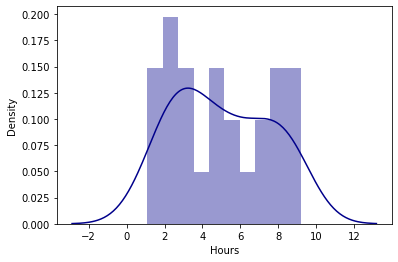

In [7]:
# Distribution of hours in the dataset
sns.distplot(data['Hours'], kde=True, bins=10,color='darkblue')
plt.show()

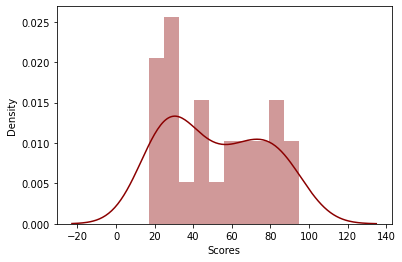

In [8]:
# # Distribution of Scores in the dataset
sns.distplot(data['Scores'], bins=10,color='darkred')
plt.show()


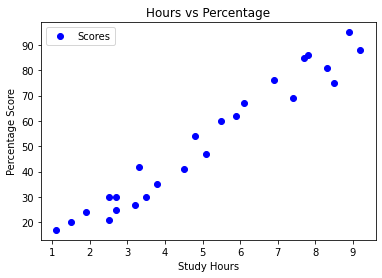

In [11]:
# Plotting Hours Study Hours vs. percentage scores 
data.plot(x='Hours', y='Scores', style='o',color="b")  
plt.title('Hours vs Percentage')  
plt.xlabel('Study Hours')  
plt.ylabel('Percentage Score')  
plt.show()

**From the above graph, we can conclude that there is a positive linear relationship between the Hours Studied and Percentage Score.**

Now, we are reshaping the data by dividing into "attributes" (inputs) and "labels" (outputs).

In [12]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Next, we need to split the data into training and test sets. We will do this by using Scikit-Learn's built-in train_test_split() method.

In [28]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## **Step 3 : Training Regression Model**


In [29]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 
print("Training complete.")

Training complete.


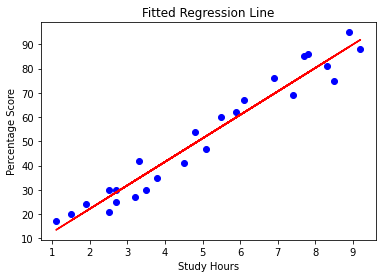

In [30]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y, c= 'b' )
plt.plot(X, line,color='r');
plt.title('Fitted Regression Line') 
plt.xlabel('Study Hours')  
plt.ylabel('Percentage Score') 
plt.show()


## **Step 4 : Making Predictions on the Test Set**
 we have fitted a regression line on our train dataset. Now it's time to make some predictions on the test data.

In [31]:
 # Predicting the scores
y_pred = lr.predict(X_test)
print("Predicted scores on test data: ",y_pred)

Predicted scores on test data:  [83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [32]:
# Accuracy of the model
lr.score(X_test,y_test) 

0.9678055545167994

The accuracy of the model is 96.8%.

**Comparing the Actual and the Predicted Scores**

In [26]:
# Comparing Actual vs Predicted
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataframe

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Predicting the Percentage Score of a student who studies for 9.25 hours a day**

In [33]:
# Test with our own data
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of study Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of study Hours = 9.25
Predicted Score = 92.38611528261494



## **Step 5 : Evaluating the model**

The final stage is to assess the algorithm's performance. This stage is critical for comparing how well various algorithms perform on a given dataset. We have chosen the Mean Absolute Error (MAE) , Root Mean Squared Error (RMSE) and R^2 which is the coefficient of regression. We may also pick from a variety of measures.


In [34]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
Root Mean Squared Error: 4.352380006653288
R-2: 0.9678055545167994


Our model doing great with less MAE and good R-Square value which is 96.8%. So, after analysing the dataset, we got Predicted score around 92 based on the number of study hours which was 9.25 hrs/day.

## **THANK YOU!**